### 1. Load CATPCHA images and get the transformed (X,y) data

In [1]:
import torch

from helper_functions.data_transformation import get_transformed_data_v2, get_transformed_data_for_captcha_evaluation

train_folder = "../data/train/combine"
test_folder = "../data/test/combine"
cached_data_path = "../data/prepared_data_cnn_v2.pth"

try:
    # Load the prepared data from cache if it already exists
    X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info = torch.load(cached_data_path)
    print("Loaded prepared data from cache.")

except FileNotFoundError:
    # Else prepare the data and save it
    X_train, y_train = get_transformed_data_v2(train_folder, is_train=True)
    X_test, y_test = get_transformed_data_v2(test_folder, is_train=False)
    X_test_captcha, y_test_captcha, failed_segmentation_info = get_transformed_data_for_captcha_evaluation(test_folder)

    torch.save((X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info), cached_data_path)
    print("Saved prepared data to cache.")


Loaded prepared data from cache.


### 2. Instantiate basic CNN model and train it

In [2]:
from models.cnn_v2 import CNN, CNNParams
from helper_functions.data_transformation import IMG_HEIGHT, IMG_WIDTH


# Instantiate model
cnn_params: CNNParams = {
    "num_classes": 36,
    "input_shape": (1, IMG_HEIGHT, IMG_WIDTH), # (channels, height, width)
    "learning_rate": 1.1*1e-3,
    "num_epochs": 20,
    "batch_size": 500,
}
cnn = CNN(cnn_params)

# Train model
cached_model_path = "../trained_models/cnn_v2_86_char_accuracy.pth"
try:
    # Load the trained model from cache if it already exists
    cnn.load_trained_model(cached_model_path)
except FileNotFoundError:
    # Else train the model and save it
    cnn.train_model(X_train, y_train)
    cnn.save_trained_model(cached_model_path)


Loaded trained model from cache with the saved epoch losses:
Epoch 1, Loss: 1.9984941482543945
Epoch 2, Loss: 1.0496342182159424
Epoch 3, Loss: 0.8424497842788696
Epoch 4, Loss: 0.7358075976371765
Epoch 5, Loss: 0.660052478313446
Epoch 6, Loss: 0.6044084429740906
Epoch 7, Loss: 0.5641525387763977
Epoch 8, Loss: 0.5202423334121704
Epoch 9, Loss: 0.494462788105011
Epoch 10, Loss: 0.4594702124595642
Epoch 11, Loss: 0.4446040987968445
Epoch 12, Loss: 0.41916972398757935
Epoch 13, Loss: 0.3969991207122803
Epoch 14, Loss: 0.3826882243156433
Epoch 15, Loss: 0.3659624457359314
Epoch 16, Loss: 0.35080838203430176
Epoch 17, Loss: 0.3365094065666199
Epoch 18, Loss: 0.32389354705810547
Epoch 19, Loss: 0.3165072500705719
Epoch 20, Loss: 0.3043881058692932


### 3. Evaluate CNN model

Character level performance (skipping SF): {
  "accuracy": 0.864,
  "precision": 0.865,
  "recall": 0.862,
  "f1_score": 0.863
}

Captcha level performance: {
  "segmentation_accuracy": 0.909,
  "captcha_accuracy (skipping SF)": 0.541,
  "captcha_accuracy (including SF)": 0.492,
  "character_accuracy (including SF)": 0.783
}

Confusion matrix for individual characters (skipping SF):


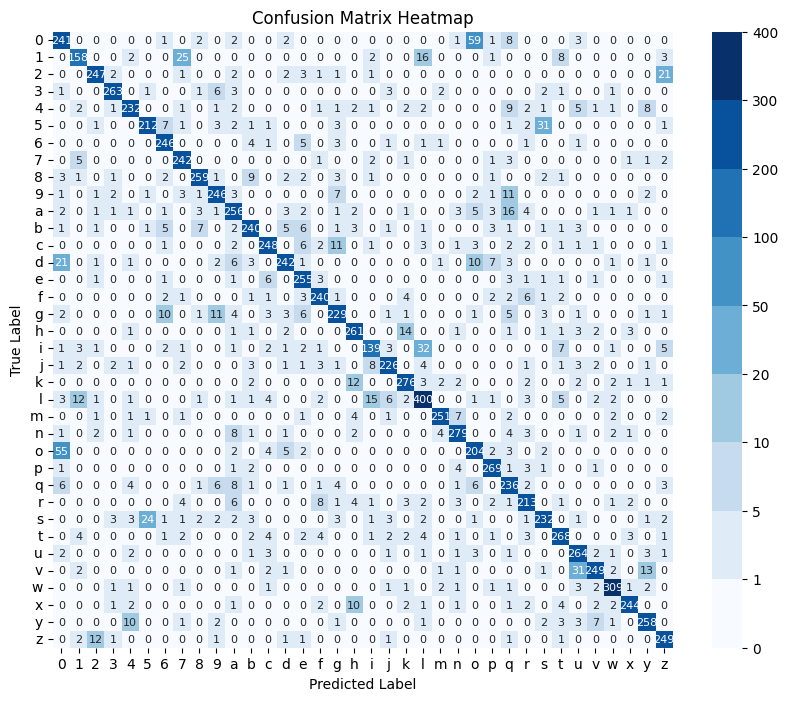

Individual character performance and top confusions (skipping SF):


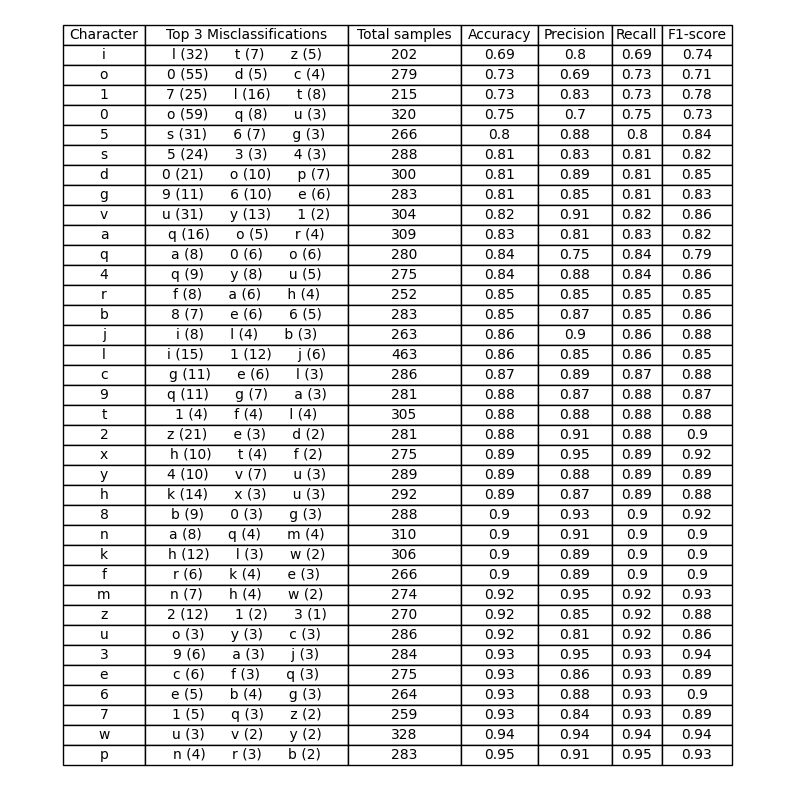

In [3]:
from helper_functions.evaluation import evaluate_character_performance, evaluate_captcha_performance, evaluate_individual_character_performance

evaluate_character_performance(cnn.model, X_test, y_test)
evaluate_captcha_performance(cnn.model, X_test_captcha, y_test_captcha, failed_segmentation_info)
evaluate_individual_character_performance(cnn.model, X_test, y_test)